# Лабораторная работа №4. Синтез КИХ-фильтров.
Лаборатория цифровой обработки сигналов, МФТИ

| Вариант                                                                	| 0    	| 1 	| 2 	| 3 	| 4 	| 5 	| 6 	|
|:------------------------------------------------------------------------:|:-----:|:-----:|:-----:|:-----:|:-----:|:-----:|:-----:|
| Частота дискретизации $f_s$ Гц                                         	| 2000	| 5000	| 5500	| 6000	| 6500	| 7000	| 7500	|
| граничная частота полосы пропускания $f_1$ Гц                          	| 450  	| 500 	| 650 	| 800 	| 950 	| 1100	| 1250	|
| граничная частота полосы задерживания $f_2$ Гц                         	| 550  	| 750 	| 925 	| 1100	| 1275	| 1450	| 1625	|
| максимально допустимое отклонение АЧХ в полосе пропускания $\delta_1$  	| 0.1  	| 0.05	| 0.05	| 0.05	| 0.05	| 0.05	| 0.05	|
| максимально допустимое отклонение АЧХ в полосе задерживания $\delta_2$ 	| 0.05 	| 0.02 	| 0.02	| 0.02	| 0.02	| 0.02	| 0.02	|

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal
import matplotlib.ticker as ticker

%matplotlib inline

# Модуль 1. Метод частотной выборки синтеза КИХ-фильтров

## Задача 1.1. Синтез ФНЧ по идеальной АЧХ. 

Синтезировать КИХ-фильтр 28 порядка ($N=29$) на основе идеального фильтра нижних частот с частотой среза $f_c=(f_1+f_2)/2$ методом частотной выборки. Частоту дискретизации принять равной $f_s$.

а) Определить максимальные уровни пульсаций $\delta_1$ и $\delta_2$ в полосе пропускания и в полосе задерживания. 

б) Изобразить на одном графике АЧХ фильтра и отсчеты ДПФ. 

в) Построить импульсную характеристику КИХ-фильтра. Определить по виду импульсной характеристики, будет ли фильтр обладать постоянной фазовой и группой задержками.

г) Получить график для групповой задержки фильтра. Сравнить с выводом в пункте (в).

In [3]:
# For ideal IIR
def ideal_lowpass(f, f_c=450, fs=2000):
    if 0 <= f <= f_c or fs-f_c <= f <=  fs:
        return 1.0 +0.0j
    else:
        return 0.0 +0.0j

In [5]:
N = 29
fs = 7000
f_1 = 1100
f_2 = 1450
H = np.zeros(N, dtype=complex)
alpha = (N-1.0)/2.0
for n in range(N):
    H[n] = ideal_lowpass(f=fs*n/N, f_c=(f_1 + f_2) / 2, fs=fs) * np.exp(-2j * np.pi * (N - 1) / 2.0 * n / N)

<IPython.core.display.Javascript object>


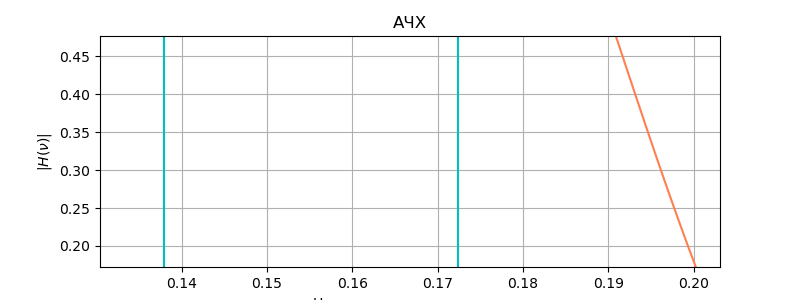

<IPython.core.display.Javascript object>


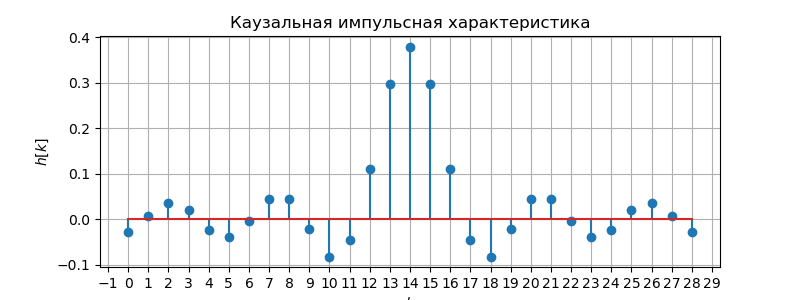

<IPython.core.display.Javascript object>


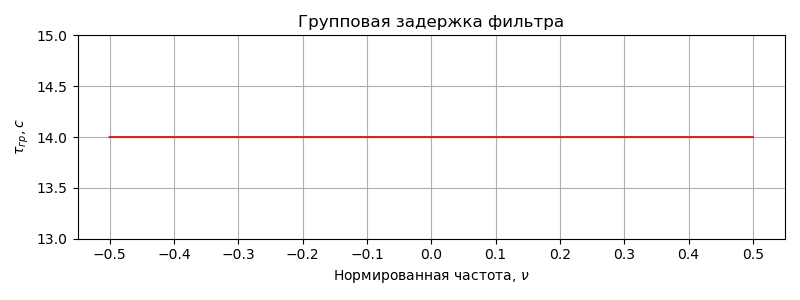

<IPython.core.display.Javascript object>


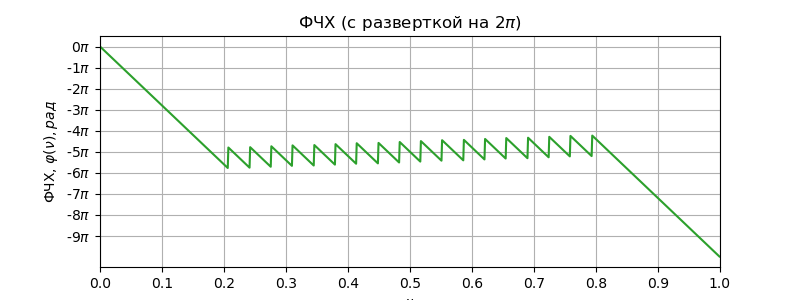

In [52]:
h = np.fft.ifft(H).real
M = 1024
H1 = abs(np.fft.fft(h, M))

plt.figure(figsize=[8, 3])
plt.plot(np.arange(M) / M, H1, color='coral')
plt.stem(np.arange(N) / N, abs(np.fft.fft(h)), linefmt='c', markerfmt='bo')
plt.grid()
plt.ylabel('$|H(\\nu)|$')
plt.xlabel('Нормированная частота, $\\nu$')
plt.title('АЧХ')

plt.figure(figsize=[8, 3])
ax = plt.axes()
ax.xaxis.set_major_locator(ticker.MultipleLocator(base=1))
plt.stem(np.arange(N), h)
plt.xlabel('$k$')
plt.ylabel('$h[k]$')
plt.title("Каузальная импульсная характеристика")
plt.grid()

delta=1e-6
nu, gd = signal.group_delay((h, [1]), w=np.linspace(-0.5+delta, 0.5-delta, num=2048), fs=1)

plt.figure(figsize=[8, 3])
plt.title('Групповая задержка фильтра')
plt.plot(nu, gd*1, 'C3')
plt.ylabel('$\\tau_{{гр}}, c$')
plt.xlabel('Нормированная частота, $\\nu$')
plt.ylim([min(gd)-1, max(gd)+1])
plt.xticks(np.linspace(-0.5, 0.5, 11))
plt.grid()
plt.tight_layout()

plt.figure(figsize=[8, 3])
ax = plt.subplot(111)
H1=((np.fft.fft(h, M)))
plt.plot(np.arange(M)/M, np.unwrap(np.angle(H1)), color='C2')
plt.title("ФЧХ (с разверткой на $2\\pi$)")
ax.xaxis.set_major_locator(ticker.MultipleLocator(base=0.1))
plt.xlim([0, 1])
#plt.yticks([-np.pi, 0, np.pi], labels=("$-\pi$", "0", "$\pi$"))
#ax.yaxis.set_major_locator(ticker.MultipleLocator(base=np.pi))
plt.yticks(np.arange(0, min(np.unwrap(np.angle(H1))), -np.pi), labels=("%i$\\pi$" %u for u in range(0, -10, -1)))
plt.xlabel('$\\nu$')
plt.ylabel('ФЧХ, $\\varphi(\\nu), рад$')
plt.grid()

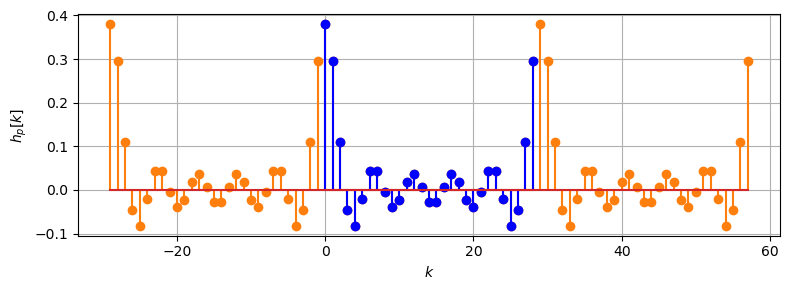

In [28]:
h = np.fft.ifft(H).real
h3 = np.concatenate((h, h, h ))
plt.figure(figsize=[8, 3])
plt.stem(np.arange(3*N)-N, h3, linefmt='C1', markerfmt='C1o')
plt.stem(np.arange(N), h, linefmt='b', markerfmt='bo')
plt.xlabel('$k$')
plt.ylabel('$h_p[k]$')
plt.grid()
plt.tight_layout()

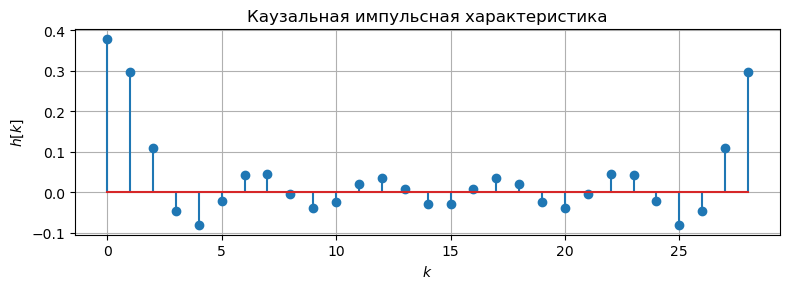

In [30]:
h = np.fft.ifft(H).real
M = 1024
H1 = abs(np.fft.fft(h, M))

plt.figure(figsize=[8, 3])
plt.stem(np.arange(N), h)
plt.xlabel('$k$')
plt.ylabel('$h[k]$')
plt.title("Каузальная импульсная характеристика")
plt.grid()
plt.tight_layout()

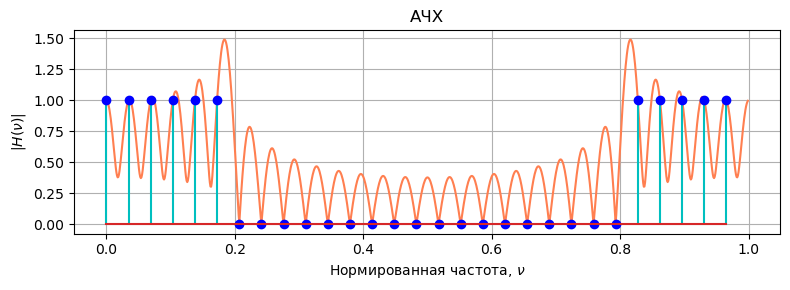

In [31]:
plt.figure(figsize=[8, 3])
plt.plot(np.arange(M)/M, H1, color='coral')
plt.stem(np.arange(N)/N, abs(np.fft.fft(h)), linefmt='c', markerfmt='bo')
plt.grid()
plt.ylabel('$|H(\\nu)|$')
plt.xlabel('Нормированная частота, $\\nu$')
plt.title('АЧХ')
plt.tight_layout()

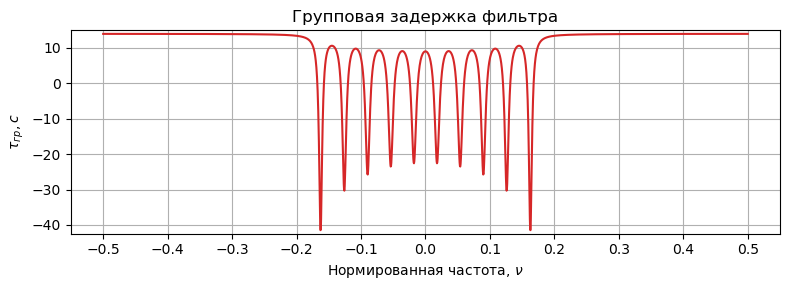

In [32]:
delta=1e-6
nu, gd = signal.group_delay((h, [1]), w=np.linspace(-0.5+delta, 0.5-delta, num=2048), fs=1)

plt.figure(figsize=[8, 3])
plt.title('Групповая задержка фильтра')
plt.plot(nu, gd*1, 'C3')
plt.ylabel('$\\tau_{{гр}}, c$')
plt.xlabel('Нормированная частота, $\\nu$')
plt.ylim([min(gd)-1, max(gd)+1])
plt.xticks(np.linspace(-0.5, 0.5, 11))
plt.grid()
plt.tight_layout()

## Задача 1.2. Синтез ФНЧ по непрерывной АЧХ.

Синтезировать КИХ-фильтр 28 порядка ($N=29$) на основе идеального фильтра нижних частот с граничной частотой полосы пропускания $f_1$ и с граничной частотой полосы задерживания $f_2$ методом частотной выборки. Частоту дискретизации принять равной $f_s$. Частотную характеристику идеального фильтра в полосе перехода аппроксимировать линейной функцией так, чтобы характеристика была непрерывной.

а) Определить максимальные уровни пульсаций $\delta_1$ и $\delta_2$ в полосе пропускания и в полосе задерживания. Сравнить с результатом в задаче 1.1.

б) Изобразить на одном графике АЧХ фильтра и отсчеты ДПФ. 

в) Построить импульсную характеристику полученного КИХ-фильтра. Определить по виду импульсной характеристики, будет ли 
фильтр обладать постоянной фазовой и группой задержками.

г) Получить график для групповой задержки фильтра. Сравнить с выводом в пункте (в).

д) Определить частоту среза (по уровню $-3$ дБ) модельного и полученного фильтров. 

In [70]:
# Not ideal, but we instead apply linear approximation here
def ideal_lowpass2(f, f_c=450, fs=2000):
    f1 = 450
    f2 = 550
    if 0 <= f <= f1 or fs-f1 <= f <=  fs:
        return 1.0
    elif f1 < f < f2: 
        return f / (f1 - f2) + (f2 / (f2 - f1))
    elif fs-f2<f<fs-f1:
        return f / (f2 - f1) + (fs - f2) / (-f2 + f1)
    else:
        return 0.0

N = 29
fs = 7000
f_1 = 1100
f_2 = 1450
H=np.zeros(N, dtype=complex)
alpha = (N - 1.0) / 2.0
for n in range(N):
    H[n] = ideal_lowpass2(f=fs*n/N, f_c=(f_1+f_2) / 2, fs=fs)

<IPython.core.display.Javascript object>


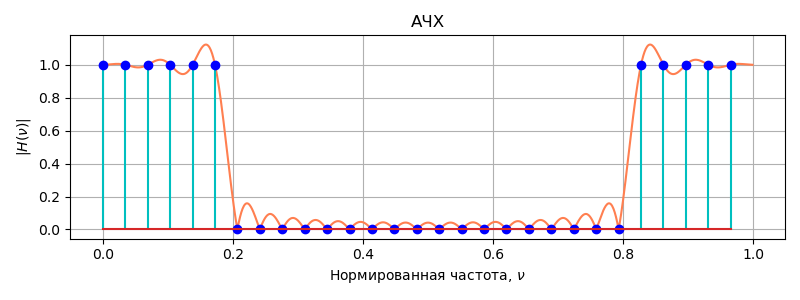

In [71]:
M = 1024
H1 = abs(np.fft.fft(h, M))

plt.figure(figsize=[8, 3])
plt.plot(np.arange(M) / M, H1, color='coral')
plt.stem(np.arange(N) / N, abs(np.fft.fft(h)), linefmt='c', markerfmt='bo')
plt.grid()
plt.ylabel('$|H(\\nu)|$')
plt.xlabel('Нормированная частота, $\\nu$')
plt.title('АЧХ')
plt.tight_layout()

<IPython.core.display.Javascript object>


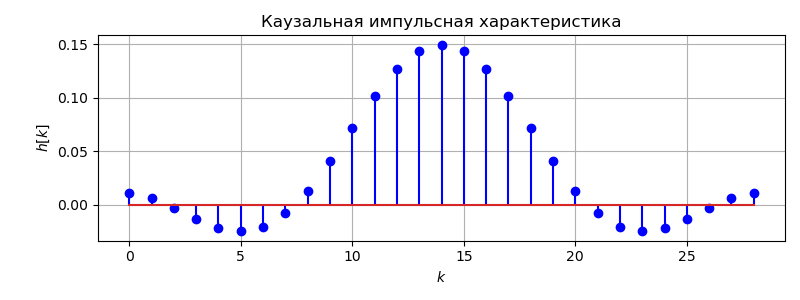

In [72]:
h = np.fft.ifft(H).real
h = np.roll(h, N // 2)

plt.figure(figsize=[8, 3])
plt.stem(np.arange(N), h, linefmt='b', markerfmt='bo')
plt.xlabel('$k$')
plt.ylabel('$h[k]$')
plt.title("Каузальная импульсная характеристика")
plt.grid()
plt.tight_layout()

## Задача 1.3*. Синтез фильтра с характеристикой «приподнятый косинус»

Синтезировать КИХ-фильтр 28 порядка ($N=29$) с частотой среза $f_c=(f_1+f_2)/2$  на основе фильтра приподнятого косинуса методом частотной выборки. Частоту дискретизации принять равной $f_s$. На интервале $[-f_s/2, f_s/2]$ частотная характеристика фильтра задается следующим образом 

$$H(f)=\left\{ \begin{matrix}
   1, & |f| < (1-\beta)f_c;\\
   \dfrac{1}{2}*\left( 1+\cos \left(\pi \dfrac{|f|-(1-\beta)f_c}{2\beta f_c} \right) \right), & (1-\beta) f_c \le |f| \le (1+\beta)f_c;  \\
   0,   &  |f| > (1+\beta)f_c. \\
\end{matrix} \right.$$

а) Подобрать такое $\beta$, чтобы модельный фильтр не выходил за максимально допустимые отклонения АЧХ в полосе пропускания и в полосе задерживания ($\delta_1$ и $\delta_2$). Изобразить полученную АЧХ фильтра.

б) Для синтезированного фильтра определить максимальные уровни пульсаций $\delta_1$ и $\delta_2$ в полосе пропускания и в полосе задерживания. Сравнить с результатами в задаче 1.1 и задаче 1.2.

в) Изобразить на одном графике АЧХ фильтра и отсчеты ДПФ. 

г) Построить импульсную характеристику полученного КИХ-фильтра. Определить по виду импульсной характеристики, будет ли 
фильтр обладать постоянной фазовой и группой задержками.

д) Получить график для групповой задержки фильтра. Сравнить с выводом в пункте (г).

е) Определить частоту среза (по уровню $-3$ дБ) полученного фильтра. Сравнить с задачей 1.2.


#  Модуль 2. Метод окон для синтеза КИХ-фильтров

### Задача 2.1. Сравнение АЧХ фильтров одного порядка 
Синтезировать КИХ-фильтры нижних частот c частотой среза $f_c$ при частоте дискретизации $f_s$ порядка $R=28$ ($N=29$) с использованием следующих окон:

* прямоугольное (окно Дирихле)
$$w[k]=\left\{ \begin{matrix}
   1,  \\
   0,  \\
\end{matrix}\begin{matrix}
   \ \ 0\le k\le N-1;  \\
   \left\{ k<0 \right\}\cup \left\{ k\ge N \right\}.  \\
\end{matrix} \right.$$

* окно Ханна 
$$w[k]=\left\{ \begin{matrix}
   0,5-0,5\cos \dfrac{2\pi k}{N-1}, & 0\le k\le N-1;  \\
   0, &\left\{ k<0 \right\}\cup \left\{ k\ge N \right\}. \\
\end{matrix} \right.$$

* окно Хэмминга
$$w[k]=\left\{ \begin{matrix}
   0,54-0,46\cos \dfrac{2\pi k}{N-1}, & 0\le k\le N-1;  \\
   0, &\left\{ k<0 \right\}\cup \left\{ k\ge N \right\}. \\
\end{matrix} \right.$$

* окно Блэкмана
$$w[k]=\left\{ \begin{matrix}
   0,42-0,5\cos \dfrac{2\pi k}{N-1}+0,08\cos \dfrac{4\pi k}{N-1}, & 0\le k\le N-1;  \\
   0, &\left\{ k<0 \right\}\cup \left\{ k\ge N \right\}. \\
\end{matrix} \right.$$

Построить графики оконной функции $w[k]$, импульсной характеристики КИХ-фильтра $h[k]$, АЧХ КИХ-фильтра(в линейном масштабе и в дБ). Определить по графикам максимальный уровень пульсаций по полосе задерживания в дБ. Заполнить таблицу.

|Окно, применяемое для синтеза фильтра |Частота среза, по уровню -3дБ, Гц |Максимальный уровень пульсаций, дБ | Ширина переходной зоны, Гц |
|:-------:|:-|:-|:-|
|Дирихле  ||||
|Ханна    ||||
|Хэмминга ||||
|Блэкмана ||||



### Задача 2.2. Синтез ФНЧ с окном Хемминга. 

Синтезировать КИХ-фильтр нижних частот с окном Хемминга наименьшего порядка при заданных требованиях к АЧХ:
* частота дискретизации $f_s$,
* граничная частота полосы пропускания $f_1$,
* граничная частота полосы задерживания $f_2$,
* максимально допустимое отклонение АЧХ в полосе пропускания $\delta_1$,
* максимально допустимое отклонение АЧХ в полосе задерживания $\delta_2$.

Воспользоваться следующей итерационной процедурой [1]:

1) Оценить длину окна по формуле 

$$\hat{N}=\left[\dfrac{3,3 f_s}{\Delta f} \right], \;\;  \Delta f=f_2-f_1$$

2) Взвесить импульсную характеристику идеального фильтра c ФЧХ $\varphi(\theta)=- \dfrac{R}{2} \theta$ окном Хэмминга выбранной длины (``scipy.firwin``, $f_c=(f_1+f_2)/2$).

$$h[k]=\left\{ \begin{matrix}
   {{h}_{\text{ideal}}}[k]w[k],  \\
   0,  \\
\end{matrix}\begin{matrix}
   \ \ 0\le k\le N-1;  \\
   \left\{ k<0 \right\}\cup \left\{ k\ge N \right\}.  \\
\end{matrix} \right.$$

$$w[k]=\left\{ \begin{matrix}
   0,54-0,46\cos \dfrac{2\pi k}{N-1}, & 0\le k\le N-1;  \\
   0, &\left\{ k<0 \right\}\cup \left\{ k\ge N \right\}. \\
\end{matrix} \right.$$

3) Проверить выполнение требований к АЧХ фильтра. Если требования не выполняются, следует увеличить порядок фильтра $R$ (на некоторое целое число) и перейти на п. 2. Если требования выполняются, то нужно уменьшить порядок фильтра  $R$ и перейти на п. 2. Уменьшение и увеличение порядка производится до тех пор, пока не будет найден минимальный порядок , при котором выполняются требования к АЧХ и уменьшение порядка на единицу приводит к нарушению требований к фильтру. 

Проверку требований к АЧХ можно произвести по графику, используя
* backend notebook `%matplotlib notebook` (в Jupyter Notebook)
* `plt.xlim()` и `plt.ylim()` (в Google Colab или в Jupyter Notebook)

Приведите графики АЧХ КИХ-фильтра с начальным ($\hat{R}=\hat{N}-1$) и конечным $R_\min$ порядками в итерационной процедуре. 
______

[1] Солонина, А. И. Цифровая обработка сигналов в зеркале MATLAB : учебное пособие / А. И. Солонина .— Санкт-Петербург : БХВ-Петербург, 2021 .— 560 с. — (Учебная литература для вузов).

P.S. Есть в библиотеке МФТИ. 
______

## Задача 2.3. Синтез ФНЧ с окном Кайзера.

Синтезировать КИХ-фильтр нижних частот с окном Кайзера наименьшего порядка при заданных требованиях к АЧХ :
* частота дискретизации $f_s$,
* граничная частота полосы пропускания $f_1$,
* граничная частота полосы задерживания $f_2$,
* максимально допустимое отклонение АЧХ в полосе пропускания $\delta_1$,
* максимально допустимое отклонение АЧХ в полосе задерживания $\delta_2$.

Параметр $\beta$ и длину окна $N$ определить по эмпирическим формулам, приведенным в лекции, или с помощью функции `signal.kaiserord`. Привести график АЧХ получившегося фильтра, сравнить порядок с фильтром из задачи 2.2. 

#  Модуль 3. Оптимизационные методы синтеза КИХ-фильтров

## Задача 3.1. Метод наименьших квадратов.

Синтезировать КИХ-фильтр методом наименьших квадратов наименьшего порядка при заданных требованиях к АЧХ :
* частота дискретизации $f_s$,
* граничная частота полосы пропускания $f_1$,
* граничная частота полосы задерживания $f_2$,
* максимально допустимое отклонение АЧХ в полосе пропускания $\delta_1$,
* максимально допустимое отклонение АЧХ в полосе задерживания $\delta_2$.

Использовать следующую итерационную процедуру:

1) Выбрать начальный порядок фильтра $R$ (например, можно взять результат решения задачи 2.3).

2) Используя функцию `scipy.signal.firls`, синтезировать КИХ-фильтр порядка $R$ методом наименьших квадратов.

3) Проверить выполнение требований к АЧХ фильтра. Если требования не выпоняются, следует увеличить порядок фильтра $R$ (на некоторое целое число) и перейти на п. 2. Если требования выполняются, то нужно уменьшить порядок фильтра  $R$ и перейти на п. 2. Уменьшение и увеличение порядка производится до тех пор, пока не будет найден минимальный порядок , при котором выполняются требования к АЧХ и уменьшение порядка на единицу приводит к нарушению требований к фильтру. 

Приведите график АЧХ КИХ-фильтра минимального порядка $R_\min$ в итерационной процедуре. 

## Задача 3.2. Метод равномерной чебышевской аппроксимации.

Синтезировать КИХ-фильтр методом равномерной чебышевской аппроксимации наименьшего порядка при заданных требованиях к АЧХ :
* частота дискретизации $f_s$,
* граничная частота полосы пропускания $f_1$,
* граничная частота полосы задерживания $f_2$,
* максимально допустимое отклонение АЧХ в полосе пропускания $\delta_1$,
* максимально допустимое отклонение АЧХ в полосе задерживания $\delta_2$.

Использовать следующую итерационную процедуру:

1) Выбрать начальный порядок фильтра $R$ (например, можно взять результат решения задачи 2.3).

2) Используя функцию `scipy.signal.remez`, синтезировать КИХ-фильтр порядка $R$ методом наименьших квадратов.

3) Проверить выполнение требований к АЧХ фильтра. Если требования не выпоняются, следует увеличить порядок фильтра $R$ (на некоторое целое число) и перейти на п. 2. Если требования выполняются, то нужно уменьшить порядок фильтра  $R$ и перейти на п. 2. Уменьшение и увеличение порядка производится до тех пор, пока не будет найден минимальный порядок , при котором выполняются требования к АЧХ и уменьшение порядка на единицу приводит к нарушению требований к фильтру. 

Приведите график АЧХ КИХ-фильтра минимального порядка $R_\min$ в итерационной процедуре. 

## Задача 3.3. Сравнение результатов.

Сравнить минимальные порядки КИХ-фильтров, которые получились в задачах 2.2, 2.3, 3.1 и 3.2. Заполнить таблицу.


|                                             	| $R_\min$ 	| $N_\min$ 	|
|:---------------------------------------------:|:---------:|:---------:|
| Оконный метод (окно Хэмминга)               	|         	|         	|
| Оконный метод (окно Кайзера)                	|         	|         	|
| Метод наименьших квадратов                  	|         	|         	|
| Метод равномерной чебышевской аппроксимации 	|         	|         	|

Определить, будут ли выполняться требование из этих задач для фильтра минимального из получившихся порядков, построенного методом частотной выборки (как в задаче 1.2).